In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [283]:
attack=pd.read_csv("datasets/attacks.csv",encoding="cp1252")

In [284]:
attack.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN


## **DATA CLEANING AND EXPLORATION**

Comencemos explorando el DataFrame para luego hacerle una limpieza y poder pasar a la sección de Análisis.

In [285]:
attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [286]:
attack.shape

(25723, 24)

In [287]:
attack.isna().sum() #La cantidad de nulos en el DataFrame es muy alta.

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [288]:
attack.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

Quito los espacios que están al final en los nombres de las columnas Species y Sex.

In [289]:
attack.rename(columns={"Species ":"Species", "Sex ":"Sex"}, inplace=True)

In [290]:
attack.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

### Duplicated Rows

Visualizar datos duplicados:

In [291]:
duplicados=attack.duplicated()  
datos_duplicados=attack[duplicados]
datos_duplicados.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6310,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6312,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
attack.drop_duplicates(inplace=True) #Eliminar datos duplicados
attack.shape  #El data frame perdió 19 mil filas aprox

(6312, 24)

In [293]:
attack.isna().sum()  #Bajó la cantidad de nulos pero sigue siendo significativa.

Case Number                  2
Date                        10
Year                        12
Type                        14
Country                     60
Area                       465
Location                   550
Activity                   554
Name                       220
Sex                        575
Age                       2841
Injury                      38
Fatal (Y/N)                549
Time                      3364
Species                   2848
Investigator or Source      27
pdf                         10
href formula                11
href                        10
Case Number.1               10
Case Number.2               10
original order               3
Unnamed: 22               6311
Unnamed: 23               6310
dtype: int64

### Duplicated Columns

In [294]:
attack.shape[0]

6312

Las columnas Case Number coinciden en casi todos sus valores, se podría ver de dejar una sola, pero como no interesan para el posterior análisis, voy a borrar las 3.

In [295]:
attack.drop(columns=["Case Number","Case Number.1","Case Number.2"],inplace=True)
attack.sample()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order,Unnamed: 22,Unnamed: 23
3574,11-Jun-1966,1966.0,Provoked,USA,Florida,"Ft. Lauderdale, Broward County",Fishing,Burton Chamberlin,M,18,...,N,09h00,1.2 m [4'] hammerhead shark,T. Bailey,1966.06.11-Chamberlin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2729.0,NaN,NaN


Sucede algo muy similar con las columnas "href" y "href formula" por lo que nuevamente se toma la determinación de eliminar las columnas.

In [296]:
(attack[
    (attack["href"] == attack["href formula"])    
].shape)

(6242, 21)

In [297]:
attack.drop(columns=["href","href formula"], inplace=True)
attack.sample()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,original order,Unnamed: 22,Unnamed: 23
4774,07-Jan-1940,1940.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,"Warner Beach, South Coast",Swimming,Frederick Aubrey Hooper,M,18,"FATAL, leg & thigh bitten",Y,16h00,2.4 m [8'] shark,"R. Guy, T. Jucker & M. Levine, GSAF",1940.01.07-Hooper.pdf,1529.0,NaN,NaN


Analicemos las columnas Unnamed 22 y 23:

In [298]:
attack.shape[0]

6312

In [299]:
attack[["Unnamed: 22"]].isna().sum() 

Unnamed: 22    6311
dtype: int64

Hay 1 solo dato no nulo, veamos su contenido:

In [300]:
display(attack[attack["Unnamed: 22"].notna()])

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,original order,Unnamed: 22,Unnamed: 23
1478,27-May-2006,2006.0,Unprovoked,USA,Hawaii,"North Shore, O'ahu",Surfing,Bret Desmond,M,31,"No injury, shark bumped surfboard",N,16h00,NaN,R. Collier,2006.05.27-Desmond.pdf,4825.0,stopped here,NaN


In [301]:
attack[["Unnamed: 23"]].isna().sum() 

Unnamed: 23    6310
dtype: int64

Hay solo 2 datos no nulos, veamos su contenido

In [302]:
display(attack[attack["Unnamed: 23"].notna()])

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,original order,Unnamed: 22,Unnamed: 23
4415,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,NaN,"Buttock bitten, tissue removed",N,NaN,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,1888.0,NaN,Teramo
5840,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,NaN,Leg bitten by netted shark PROVOKED INCIDENT,N,NaN,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,463.0,NaN,change filename


Elimino ambas:

In [303]:
attack.drop(columns=["Unnamed: 22","Unnamed: 23"],inplace=True)
attack.sample()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,original order
1483,04-May-2006,2006.0,Unprovoked,USA,Florida,"Hutchinson Island, St. Lucie County",Swimming,Rachel King,F,20s,2 lacerations on lower right leg,N,16h30,NaN,"TCPalm.com, 5/4/2006",2006.05.04-King.pdf,4820.0


### Null Values

Antes de analizar qué hacer con casos complejos, voy a eliminar la/s filas que tienen todos sus valores nulos.

In [304]:
attack.isna().sum()

Date                        10
Year                        12
Type                        14
Country                     60
Area                       465
Location                   550
Activity                   554
Name                       220
Sex                        575
Age                       2841
Injury                      38
Fatal (Y/N)                549
Time                      3364
Species                   2848
Investigator or Source      27
pdf                         10
original order               3
dtype: int64

In [305]:
attack.dropna(axis=0, inplace=True, how="all") #Otra forma sería con thresh=1 en lugar de how="all"

In [306]:
attack.isna().sum()

Date                         7
Year                         9
Type                        11
Country                     57
Area                       462
Location                   547
Activity                   551
Name                       217
Sex                        572
Age                       2838
Injury                      35
Fatal (Y/N)                546
Time                      3361
Species                   2845
Investigator or Source      24
pdf                          7
original order               0
dtype: int64

Viendo los datos anteriores se ve que se borraron únicamente 3 filas. A priori se podría pensar que si ya borramos las filas duplicadas, debería quedar como máximo una sola fila todos sus valores NaN, pero esto no es cierto ya que esas filas se consideran únicas, es decir, no se eliminan con .drop_duplicates().

Analicemos la columna Year ya que puede tener datos muy antiguos/poco confiables

In [307]:
print(attack.Year.unique())

[2018. 2017.   nan 2016. 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008.
 2007. 2006. 2005. 2004. 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996.
 1995. 1984. 1994. 1993. 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986.
 1985. 1983. 1982. 1981. 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973.
 1972. 1971. 1970. 1968. 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960.
 1959. 1958. 1957. 1956. 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948.
 1848. 1947. 1946. 1945. 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937.
 1936. 1935. 1934. 1933. 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925.
 1924. 1923. 1922. 1921. 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913.
 1912. 1911. 1910. 1909. 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901.
 1900. 1899. 1898. 1897. 1896. 1895. 1894. 1893. 1892. 1891. 1890. 1889.
 1888. 1887. 1886. 1885. 1884. 1883. 1882. 1881. 1880. 1879. 1878. 1877.
 1876. 1875. 1874. 1873. 1872. 1871. 1870. 1869. 1868. 1867. 1866. 1865.
 1864. 1863. 1862. 1861. 1860. 1859. 1858. 1857. 18

Se van a eliminar las filas correspondientes a los años: 0; 5; 77 y 500, por ser outliers y datos demasiado antiguos (datos cercanos al año 0, son mucho menos confiables que los más actuales) respecto al resto de los datos. A su vez se va a borrar el NaN que está entre el 2016 y el 2017.

In [308]:
attack = attack.loc[~((attack['Year'] == 0) | (attack['Year'] == 5) | (attack['Year'] == 77) | (attack['Year'] == 500) | (np.isnan(attack['Year'])))]
print(attack.Year.unique())

[2018. 2017. 2016. 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007.
 2006. 2005. 2004. 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995.
 1984. 1994. 1993. 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985.
 1983. 1982. 1981. 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972.
 1971. 1970. 1968. 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959.
 1958. 1957. 1956. 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848.
 1947. 1946. 1945. 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936.
 1935. 1934. 1933. 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924.
 1923. 1922. 1921. 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913. 1912.
 1911. 1910. 1909. 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901. 1900.
 1899. 1898. 1897. 1896. 1895. 1894. 1893. 1892. 1891. 1890. 1889. 1888.
 1887. 1886. 1885. 1884. 1883. 1882. 1881. 1880. 1879. 1878. 1877. 1876.
 1875. 1874. 1873. 1872. 1871. 1870. 1869. 1868. 1867. 1866. 1865. 1864.
 1863. 1862. 1861. 1860. 1859. 1858. 1857. 1856. 18

Veamos que columnas nos están quedando por el momento:

In [309]:
attack.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species',
       'Investigator or Source', 'pdf', 'original order'],
      dtype='object')

Continuamos con eliminar ciertas columnas que no aportan información para el posterior análisis. Muchas de las siguientes pueden ser útiles para otros análisis (no son como lo son las columnas unnamed en los DataFrames, que generalmente no aportan información).

In [310]:
attack.drop(columns=["Area","Location", "Name", "pdf", "original order","Date","Time"], inplace=True)

In [311]:
attack.sample()

,Year,Type,Country,Activity,Sex,Age,Injury,Fatal (Y/N),Species,Investigator or Source
1614,2005.0,Unprovoked,CUBA,Swimming,M,19,Left foot severed,N,3 m [10'] shark,Cuba News


## **Análisis**:

#### **Hipótesis 1**: Los ataques disminuyeron con el paso de los años

Me basé en que la gente se fue volviendo más consciente con el paso del tiempo y se fueron creando métodos preventivos de ataques de tiburones, como por ejemplo redes en playas australianas que evitan que los tiburones ingresen a la zona en la que se bañan las personas. Para estudiar la validez de esta hipótesis me voy a tomar un subset del nuevo Dataframe "attack" que resultó de aplicarle una limpieza al original. Luego, al propio subset se le va a hacer una limpieza más específica.

Subset de interés: subset_h1

Queremos borrar los nulos en el subset, y para eso haremos una copia del mismo para que solo se borren los nulos en la copia, pero antes renombremos la variable 'Fatal (Y/N)' para simplificar próximos códigos:

In [312]:
attack.rename(columns={"Fatal (Y/N)":"Fatal"}, inplace=True)

In [313]:
subset_h1=attack[["Year","Fatal"]].copy()
subset_h1

,Year,Fatal
0,2018.0,N
1,2018.0,N
2,2018.0,N
3,2018.0,N
4,2018.0,N
...,...,...
6169,1595.0,UNKNOWN
6170,1580.0,Y
6171,1555.0,UNKNOWN
6172,1554.0,UNKNOWN


In [314]:
subset_h1.dropna(axis=0, inplace=True) #Eliminación de nulos.

In [315]:
subset_h1.isna().sum() #Comprobación de que no quedan nulos.

Year     0
Fatal    0
dtype: int64

Para estudiar el comportamiento de los ataques a lo largo del tiempo se van a realizar algunas gráficas. Para ello, interesa que la columna 'Fatal' tenga como valores únicos: Y y N (Yes y No, respectivamente), pues son los únicos parámetros que admite esta variable ya que estaban en el nombre original ("Fatal (Y/N)"). Veamos qué valores únicos tiene actualmente:

In [316]:
subset_h1["Fatal"].unique()

array(['N', 'Y', 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'], dtype=object)

Se van a pasar todos los valores a mayúsculas para poder agrupar las "Y" con las "y", y también se le quitarán los espacios que aparezcan antes y después de las "N" para poder agruparlas y poder eliminar las filas que contengan los otros valores (por ejemplo "2017").

In [317]:
subset_h1['Fatal']=subset_h1['Fatal'].str.upper() #Conversión a mayúsculas
subset_h1['Fatal']=subset_h1['Fatal'].replace({' N':'N', 'N ':'N', '':'Y'}) #Reemplazo de nombres
subset_h1_limpio=subset_h1[(subset_h1['Fatal']=='N')|(subset_h1['Fatal']=='Y')] #Que solo aparezcan valores "Y" y "N"
print(subset_h1_limpio['Fatal'].unique())

['N' 'Y']


In [318]:
subset_h1_limpio.value_counts

<bound method DataFrame.value_counts of         Year Fatal
0     2018.0     N
1     2018.0     N
2     2018.0     N
3     2018.0     N
4     2018.0     N
...      ...   ...
6162  1700.0     N
6163  1700.0     Y
6168  1642.0     Y
6170  1580.0     Y
6173  1543.0     Y

[5563 rows x 2 columns]>

Se procede a realizar una gráfica de Ataques de tiburones por año (desde el año 1800 en adelante porque previo a dicho año, los ataques registrados son despreciables frente a los del post 1800):

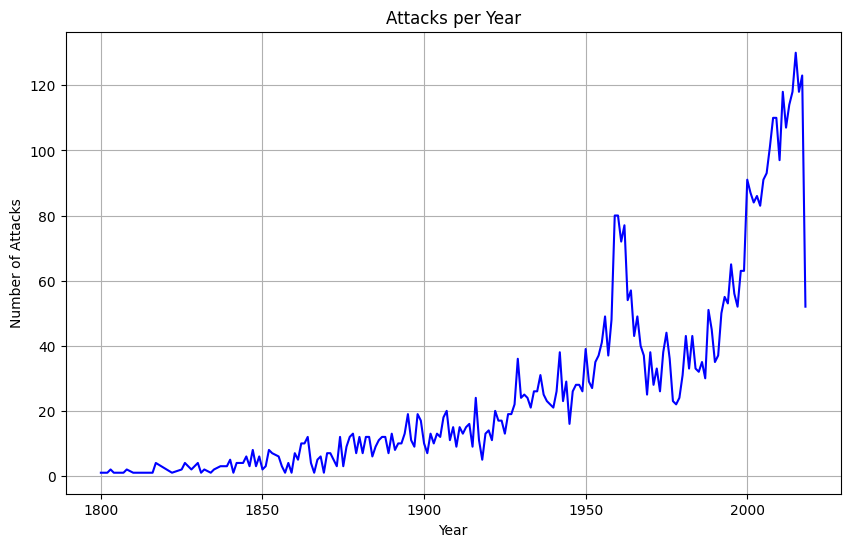

In [319]:
subset_h1_limpio.loc[:, "Year"] = subset_h1_limpio["Year"].astype(int)
subset_h1_limpio = subset_h1_limpio[subset_h1_limpio["Year"] >= 1800]
attacks_per_year = subset_h1_limpio.groupby("Year").size()

attacks_per_year.plot(kind="line", color="blue", figsize=(10, 6))
plt.title("Attacks per Year")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.grid(True)

plt.savefig("attacks_per_year.png")
plt.show()

Del gráfico superior se puede ver que no solo no se cumple la hipótesis planteada (Hipótesis 1), sino que el resultado es prácticamente opuesto. Esto puede deberse a diversos factores, entre ellos: 
1) En los años más cercanos al 1800, probablemente se tomaban muchos menos registros de los ataques reales. Quizás por falta de tecnología o falta de interés en el análisis.
   
2) Por otro lado, la población mundial viene en aumento, por lo que si el comportamiento de los humanos y el de los tiburones se mantiene relativamente constante en el tiempo, la cantidad de ataques va a aumentar. Simplemente por "un tema de números". A su vez, si la población se está incrementando, en particular el turismo también aumenta. Si el turismo en cierto tipo de playas en los que habite el animal aumenta, entonces probablemente los ataques aumenten.

3) El hecho de que haya calentamiento global también podría estar afectando. El aumento de la temperatura oceánica genera que en ciertas zonas los tiburones se desplacen hacia zonas más frías. Esa migración puede generar que tengan menos comida e incluso estrés. Eso puede llevar a que los tiburones sean más agresivos y por lo tanto aumenten los ataques. 


Ahora interesa realizar un gráfico similar, pero en lugar de poner ataques en general, poner ataques letales. Esto es importante para poder determinar que tan peligroso es el animal y por ende que las personas que se encuentren en un entorno de riesgo (estando cerca de los tiburones) tomen las medidas de seguridad apropiadas. 

En caso de que el animal causara pocas muertes, las medidas de seguridad probablemente no serían las mismas.

Volviendo al gráfico de interés, para poder realizarlo es necesario imponerle al subset anterior que la variable "Fatal" solo tome valores: "Y" (Yes), es decir, los casos de muertes.

In [320]:
subset_h1_limpio_letal=subset_h1_limpio[subset_h1_limpio["Fatal"]=="Y"]

In [321]:
print(subset_h1_limpio_letal["Fatal"].unique())

['Y']


In [322]:
subset_h1_limpio_letal.value_counts()

Year    Fatal
1959.0  Y        24
1956.0  Y        21
1958.0  Y        18
2000.0  Y        18
1944.0  Y        17
                 ..
1842.0  Y         1
1848.0  Y         1
1857.0  Y         1
1859.0  Y         1
2018.0  Y         1
Name: count, Length: 194, dtype: int64

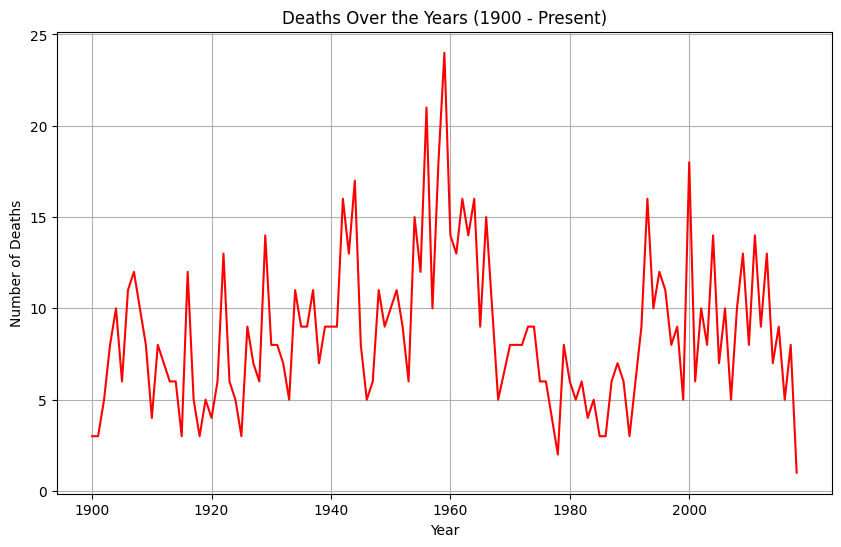

In [323]:
deaths_by_year = subset_h1_filtrado[subset_h1_filtrado['Fatal'] == 'Y'].groupby('Year').size()

plt.figure(figsize=(10, 6))
deaths_by_year.plot(kind="line", color="red")
plt.title("Deaths Over the Years (1900 - Present)")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.grid(True)

plt.xticks(np.arange(1900, max(deaths_by_year.index) + 1, 20)) #Step 20=años

plt.savefig("deaths_per_year.png")
plt.show()

El gráfico anterior está referido al período entre el año 1900 hasta el 2018. Se tomó esa determinación porque si se hacía desde el 1800 en adelante, parecería que tuviera líneas veritcales y no quedaba tan claro de visualizar. También se cambió el step en el eje de los años también por un tema visual (step=20años). 

Finalmente se quiere superponer ambos gráficos en un mismo plot para poder apreciar/estimar, de manera intuitiva (es decir, sin cálculos), qué tan probable era morir si te atacaba un tiburón. 

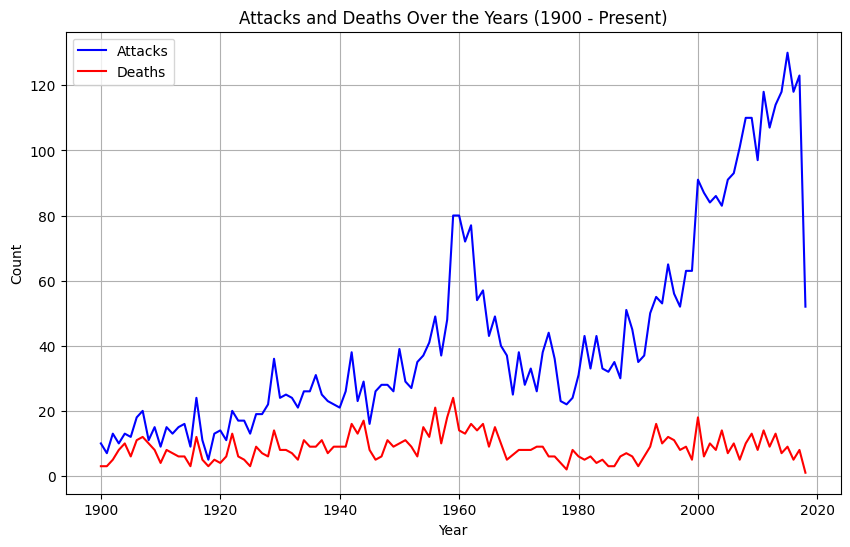

In [324]:
attacks_per_year = attacks_per_year[attacks_per_year.index >= 1900]
deaths_by_year = deaths_by_year[deaths_by_year.index >= 1900]
attacks_per_year.plot(kind="line", color="blue", figsize=(10, 6), label="Attacks")
deaths_by_year.plot(kind="line", color="red", label="Deaths")
plt.title("Attacks and Deaths Over the Years (1900 - Present)")
plt.xlabel("Year")
plt.ylabel("Count")


plt.legend()
plt.grid(True)
plt.savefig("attacks_and_deaths_per_year.png")
plt.show()

Del gráfico anterior se puede observar que la curva roja siempre está comlpetamente por debajo de la azul. Esto tiene sentido ya que las muertes son un caso particular de los ataques (son ataques mortales). Por lo que para ningún año se puede dar que hayan más muertes que ataques. Que se haya cumplido dicha condición, le da cierta credibilidad a los datos del DataFrame. 

Otra observación es que la cantidad de muertes a lo largo del siglo XX tiene una tendencia a ser constante. No tiene valores que estén demasiado desviados de la media. Sin embargo, la cantidad de ataques tiene una tendencia clara a aumentar. Esto indica que con el paso del tiempo, el porcentaje de *ataques letales/ataques generales* por cada año, disminuye en gran medida. Eso nos muestra que la mayoría de los ataques de estas últimas décadas no fueron letales. Yo creo que esto se debe en gran parte a los avances en medicina. Generalmente, en los ataques de tiburones se desprende mucha sangre de la víctima, puede haber amputaciones, daño en algún órgano, etc. El hecho de tener una medicina mucho mas avanzada que la que había en los años más proximos al 1900, hace una gran diferencia. También se da que en la actualidad, la gente tiene una mayor consciencia que antes debido a la gran cantidad de información que hay disponible (parte será debida a aprender de experiencias negativas, estudios biológicos, etc). Esto (además de ayudar en prevención de ataques) hace que la gente sepa cómo reaccionar frente a un ataque con mayor claridad que antes, generando que el porcentaje de muertos sobre ataques totales sea mucho menor del que había a principios del siglo.

A continuación se va a hacer otra representación de la gráfica anterior. Me resulta muy claro visualizar este tipo de análisis temporales en gráficas de líneas como las presentadas anteriormente. Sin embargo, veo que esas gráficas no quedaron muy estéticas y por eso decidí hacer una nueva. Luego la analizaremos porque puede que obtengamos información que no podamos apreciar en las anteriores.  

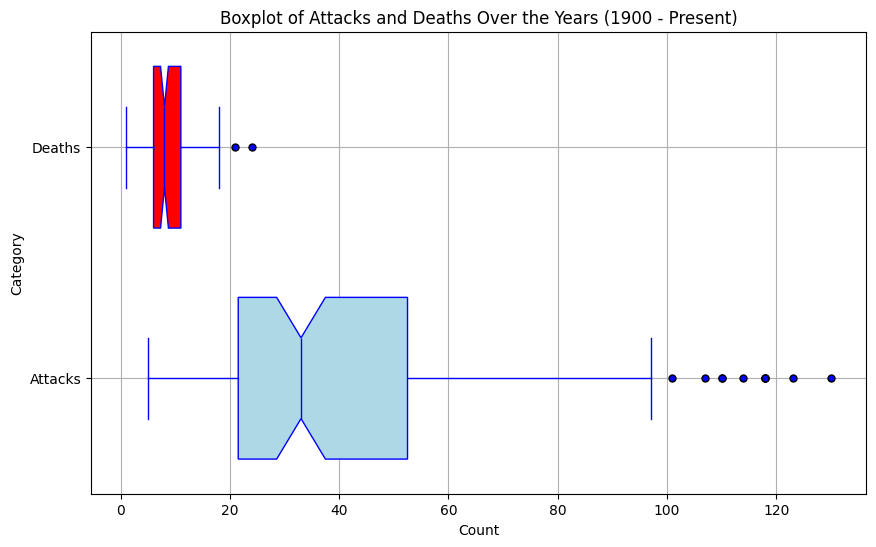

In [325]:
combined_data = pd.DataFrame({"Attacks": attacks_per_year, 'Deaths': deaths_by_year})


plt.figure(figsize=(10, 6))
combined_data.boxplot(vert=False, widths=0.7, patch_artist=True, medianprops=dict(color="blue"), boxprops=dict(facecolor="lightblue", color="blue"), whiskerprops=dict(color="blue"), capprops=dict(color="blue"), flierprops=dict(marker="o", markersize=5, markerfacecolor="blue"), notch=True, positions=[0, 1])
plt.title("Boxplot of Attacks and Deaths Over the Years (1900 - Present)")
plt.xlabel("Count")
plt.ylabel("Category")
plt.grid(True)

#Quise mantener los colores rojo y azul que se utilizaron para las gráficas anteriores para no generar confusiones.

plt.gca().patches[1].set_facecolor("red")
plt.savefig("boxplot.png")

plt.show()

El BoxPlot que se encuentra arriba no aporta mucha información nueva al análisis. Pero sí ayuda a visualizar los outliers. Sobre todo los de la gráfica de Deaths. Viendo la gráfica de deaths en la representación de líneas, no queda tan claro si tiene outliers, pero acá en el Boxplot se ven los 2 valores claramente. También se puede observar que la gráfica de ataques tiene varios outliers: alrededor de 1960 y cerca de la actualidad. Sinceramente no se a que se puede deber. Capaz que simplemente fue casualidad.

#### **Hipótesis 2**: Muerieron más hombres que mujeres

Primero, quiero hacer una hipótesis dentro de la Hipótesis 2: el DataFrame da información únicamente sobre 2 géneros: F y M. Es una interpretación mia en base a los valores únicos que toma la columna "Sex". Creo que más allá de las interpretaciones/definiciones que existan sobre los géneros, corresponde trabajar solo con los géneros F y M pues se entiende que son de los que habla el DataFrame.

Ahora, volviendo a la Hipótesis 2, si bien en general los hombres son más fuertes y nadan más rápido que las mujeres, creo que eso no es relevante debido a que la diferencia física entre los 2 géneros es despreciable frente a las habilidades de un tiburón. Entiendo que los hombres son más deportistas y al mismo tiempo más inconscientes que las mujeres por lo que creo que habrán mucho más encuentros tiburón-hombre que tiburón-mujer, por lo tanto supongo que habrán más muertes de hombres.



Al igual que con la Hipótesis 1, vamos a crear un nuevo subset para trabajar con mayor comodidad y para poder borrar filas que contengan nulos debido a que se va a usar una copia, el DataFrame original no va a ver afectado.

In [326]:
subset_h2=attack[["Sex","Fatal"]].copy()
subset_h2

,Sex,Fatal
0,F,N
1,F,N
2,M,N
3,M,N
4,M,N
...,...,...
6169,M,UNKNOWN
6170,M,Y
6171,M,UNKNOWN
6172,M,UNKNOWN


In [327]:
subset_h2.dropna(axis=0, inplace=True) #Eliminación de nulos (se cargaron 1000 filas aprox)

In [328]:
subset_h2

,Sex,Fatal
0,F,N
1,F,N
2,M,N
3,M,N
4,M,N
...,...,...
6169,M,UNKNOWN
6170,M,Y
6171,M,UNKNOWN
6172,M,UNKNOWN


Análogo a lo que se hizo con la Hipótesis 1, vamos a quedarnos sólo con los valores únicos F y M. Además, también hay que volver a aplicárselo a "Fatal" porque el subset anterior era una copia y esta es otra que también se extrajo del original.

Luego de realizar dichos cambios, vamos a graficar simplemente el número de muertes por cada género y ver si se cumple la hipótesis.

In [329]:
subset_h2["Fatal"].unique()

array(['N', 'Y', 'M', 'UNKNOWN', '2017', ' N', 'y'], dtype=object)

In [330]:
subset_h2["Sex"].unique()

array(['F', 'M', 'M ', 'lli', 'N', '.'], dtype=object)

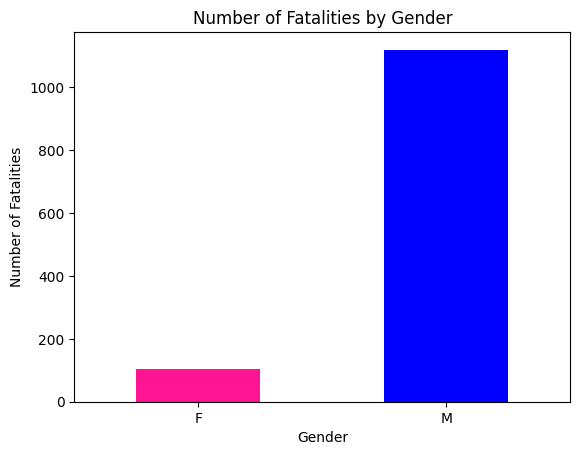

In [331]:
subset_h2['Sex'] = subset_h2['Sex'].str.strip().replace({'M ': 'M', 'lli': pd.NA, 'N': pd.NA, '.': pd.NA})

subset_h2['Fatal'] = subset_h2['Fatal'].str.strip().str.upper().replace({'UNKNOWN': pd.NA, '2017': pd.NA, 'N': 'N', 'Y': 'Y', 'Y ': 'Y'})
subset_h2.dropna(subset=['Sex', 'Fatal'], inplace=True)

deaths_by_gender = subset_h2[subset_h2['Fatal'] == 'Y'].groupby('Sex').size()


deaths_by_gender.plot(kind='bar', color=['#FF1493', 'blue'])
plt.title('Number of Fatalities by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=0)
plt.savefig("fatalities_by_gender.png")
plt.show()

Claramente se puede ver que la muerte de los hombres supera por un gran margen a la de las mujeres. La cantidad de muertes masculinas es cerca de ser 10 veces más que la cantidad femenina, por lo que se estaría validando la Hipótesis 2. Al parecer, para ver la probabilidad de morir que tiene un individuo estando en zona de riesgo frente a un posible ataque del animal, es claro que la actividad que realiza el individuo tiene una ponderación mucho mayor a la que pueda tener el género. Es decir, un factor muy importante es la actividad que uno realice y no tanto las habilidades físicas del individuo. Porque como mencionaba en la hipótesis, tener un poco más de fuerza que una mujer, no te va a ayudar demasiado frente a un tiburón (a excepción de casos en los que el tiburón es pequeño o similar. Igualmente, si el tiburón decide atacar al humano, posiblemente sea porque el tiburón intuye que lo puede superar en la pelea, sino, difícilmente se involucraría). 

Algo que podría ser interesante, es hacer este mismo análisis pero con algún animal que no sea tan superior a un humano en un combate digamos. Porque ahí el hecho de que en general el hombre sea más fuerte, podría tener un peso relevante, no como el que tiene en este análisis de ataque de tiburones.

Hay muchos otros factores que pueden influir como la inteligencia, miedo, reflejos, entre otros, pero es muy difícil de poder incluirlos basándonos en este DataFrame que no habla sobre las capacidades del humano atacado.

Decidí agregar otra gráfica a este análisis que incluya la provocación del humano hacia el animal, separándolo por género nuevamente. Me pareció interesante ya que parte de la hipótesis decía que el hombre en general es más inconsciente/arriesgado que la mujer. Es muy complejo poder determinar esto porque hay ataques que se consideran provoked y son de boating por ejemplo. Ahí en general el hombre no estaría realizando ninguna locura pero igual se cuenta como ataque provocado. De todas formas, viendo los porcentajes de la gráfica presentada a continuación, se puede ver que el hombre es menos cuidadoso que la mujer, al menos en este tipo de situaciones acuáticas.

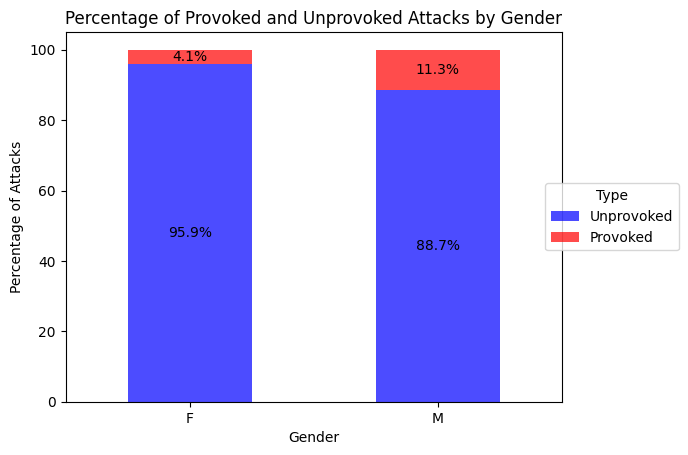

In [332]:
subset_h2['Type'] = attack.loc[subset_h2.index, 'Type']
subset_h2['Sex'] = subset_h2['Sex'].str.strip().replace({'M ': 'M', 'lli': pd.NA, 'N': pd.NA, '.': pd.NA})
subset_h2['Fatal'] = subset_h2['Fatal'].str.strip().str.upper().replace({'UNKNOWN': pd.NA, '2017': pd.NA, 'N': 'N', 'Y': 'Y', 'Y ': 'Y'})
subset_h2.dropna(subset=['Sex', 'Fatal', 'Type'], inplace=True)
provoked_unprovoked_by_gender = subset_h2.groupby(['Sex', 'Type']).size().unstack(fill_value=0)
provoked_unprovoked_by_gender = provoked_unprovoked_by_gender[['Unprovoked', 'Provoked']]
totals = provoked_unprovoked_by_gender.sum(axis=1)
provoked_unprovoked_by_gender_perc = provoked_unprovoked_by_gender.divide(totals, axis=0) * 100
#Ya se habían realizado algunos replace y están puestos nuevamente de forma innecesaria, pero no genera problemas. 
#Se utilizó ayuda de Internet para poder realizar este plot.

ax = provoked_unprovoked_by_gender_perc.plot(kind='bar', stacked=True, color=['blue', 'red'], alpha=0.7)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.title('Percentage of Provoked and Unprovoked Attacks by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Attacks')
plt.xticks(rotation=0)
plt.legend(title='Type', loc='center right', bbox_to_anchor=(1.25, 0.5), labels=['Unprovoked', 'Provoked'])
plt.savefig("provoked_unprovoked_by_gender.png")
plt.show()

#### **Hipótesis 3**: El tiburón blanco es la especie más agresiva.

Por último, se quiere estudiar la agresividad que tiene el tiburón blanco comparado con otras especies. Es un dicho que todos hemos oido alguna vez y resulta interesante analizar los datos para ver si es cierto o si es un mito. Vamos a realizar el procedimiento habitual de crear un subset, entre otras cosas y luego graficar resultados. 

In [333]:
attack.sample()

,Year,Type,Country,Activity,Sex,Age,Injury,Fatal,Species,Investigator or Source
5872,1876.0,Unprovoked,AUSTRALIA,NaN,M,NaN,"FATAL, ""his side was bitten""",Y,NaN,"G.P. Whitley (1951), p.192"


Muertes por especie:

In [334]:
subset_h3=attack[["Year","Type","Fatal","Species"]].copy()
subset_h3

,Year,Type,Fatal,Species
0,2018.0,Boating,N,White shark
1,2018.0,Unprovoked,N,NaN
2,2018.0,Invalid,N,NaN
3,2018.0,Unprovoked,N,2 m shark
4,2018.0,Provoked,N,"Tiger shark, 3m"
...,...,...,...,...
6169,1595.0,Unprovoked,UNKNOWN,NaN
6170,1580.0,Unprovoked,Y,NaN
6171,1555.0,Unprovoked,UNKNOWN,NaN
6172,1554.0,Unprovoked,UNKNOWN,Possibly white sharks


In [335]:
subset_h3.dropna(axis=0, inplace=True) #Eliminación de nulos.

In [336]:
subset_h3.isna().sum()

Year       0
Type       0
Fatal      0
Species    0
dtype: int64

In [337]:
subset_h3["Species"] = subset_h3["Species"].replace({        #Con esto incluí algunos nombres que hacían referencia al White Shark.
    "White shark, 5 m to 6 m [16.5' to 20']": "White shark",
    "Possibly a white shark": "White shark",
    "Possibly white sharks": "White shark",
    
})

In [338]:
subset_h3["Species"].value_counts()

Species
White shark                     162
Tiger shark                      70
Bull shark                       47
4' shark                         40
6' shark                         39
                               ... 
Bull shark, 2.3 m [7.5']          1
0.9 m  [3'] shark                 1
Mako shark, 14'                   1
1.9 m [6.5'] bull shark           1
White shark, 1600-lb female       1
Name: count, Length: 1482, dtype: int64

Voy a realizar una gráfica de barras horizontales (se leen mejor los nombres de los tiburones que en una gráfica vertical).

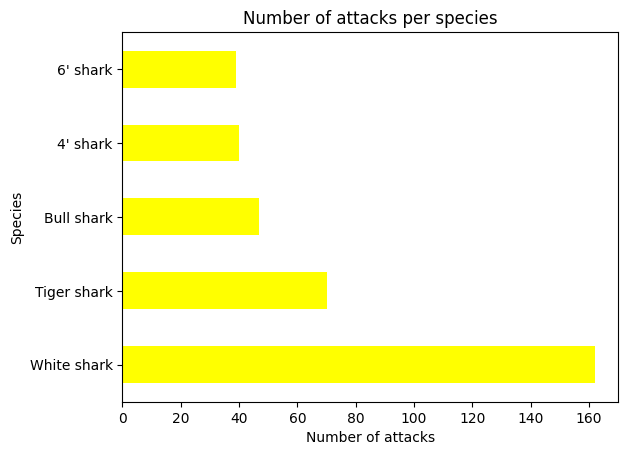

In [339]:
ataques_=subset_h3["Species"].value_counts()
ataques_[ataques_>35].plot.barh(color="yellow") 
plt.title("Number of attacks per species")
plt.xlabel("Number of attacks")
plt.savefig("attacks_per_species.png")

En la representación presentada arriba, se puede ver el número de ataques de las 5 especies que tuvieron valores más altos. El tiburón blanco supera ampliamente a la cantidad de ataques del segundo (Tiger shark), y con un gran margen (más del doble de ataques). Para ver que tan agresivo es el animal, es importante ver nuevamente la relación entre ataques provocados y no provocados, por cada especie. Porque en teoría podría pasar que el tiburón blanco sea tranquilo pero justo la gente tienda a molestar especialmente a esa especie y por eso decidiera atacar. Para ver esto, veamos el siguiente diagrama:

In [340]:
attack.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

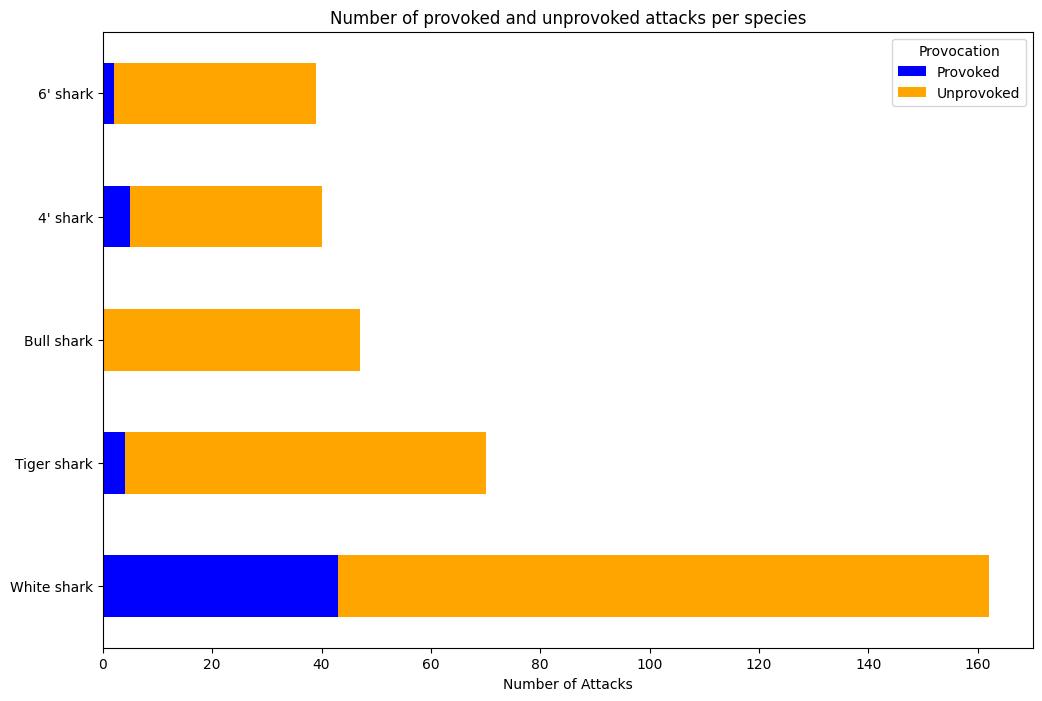

In [341]:
attack_type_mapping = {          #Se clasifica el tipo de actividad entre provoked y unprovoked.
    'Boating': 'Provoked',
    'Unprovoked': 'Unprovoked',
    'Invalid': 'Unprovoked',
    'Provoked': 'Provoked',
    'Questionable': 'Unprovoked',
    'Sea Disaster': 'Unprovoked',
    'Boat': 'Provoked',
    'Boatomg': 'Provoked'
}


subset_h3["Provocation"] = subset_h3["Type"].map(attack_type_mapping)

provoked_unprovoked_counts = subset_h3.groupby(["Species", "Provocation"]).size().unstack(fill_value=0)
total_attacks = provoked_unprovoked_counts.sum(axis=1)
top_5_species = total_attacks.nlargest(5).index #Las 5 especies con mayor cantidad de ataques. Se podía haber elegido otro valor. Fue a criterio personal
provoked_unprovoked_counts_top5 = provoked_unprovoked_counts.loc[top_5_species]


provoked_unprovoked_counts_top5.plot(kind="barh", stacked=True, color=["blue", "orange"], figsize=(12, 8))
plt.title("Number of provoked and unprovoked attacks per species")
plt.xlabel("Number of Attacks")
plt.ylabel("")
plt.legend(title="Provocation", loc="upper right", labels=["Provoked", "Unprovoked"])
plt.savefig("provoked_unprovoked_species.png")
plt.show()

Se puede ver que si bien el tiburón blanco tiene un alto porcentaje de ataques provocados, el total de ataques no provocados es superior a los ataques de las otras especies (tanto provocados como no provocados). Por lo que se vuelve a confirmar la hipótesis sobre la agresividad del tiburón blanco.

También resulta de interés estudiar la fatalidad de dicha especie. Ya vimos que es la más agresiva, pero veamos qué porcentaje de los ataques terminan siendo letales:

In [342]:
white_shark_attacks = subset_h3[subset_h3["Species"] == "White shark"]

fatal_attacks = white_shark_attacks[white_shark_attacks["Fatal"] == "Y"]
total_attacks = len(white_shark_attacks)
fatal_attacks_count = len(fatal_attacks)
proportion_fatal = fatal_attacks_count / total_attacks

print(f"The proportion of fatal attacks for the White Shark is: {proportion_fatal:.2%}")

The proportion of fatal attacks for the White Shark is: 27.16%


El resultado dio 27.16%. Hubiera esperado un número mayor. Yo creo que si el tiburón cada vez que atacara tuviera intención de matar, el porcentaje sería bastante cercano a 100. Sin embargo, dio mucho menor. Quizás se puede interpretar que el tiburón blanco rara vez ataca a un humano para alimentarse.